# DACON 사물 이미지 분류 경진대회 Basesline 1



##환경 설정 및 데이터 로드

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ['CUDA_VISIBLE_DEVICES']='0'  #GPU 할당

In [ ]:
os.chdir('/content/drive/MyDrive/ESAA(22-1)/Week16')
os.getcwd()

'/content/drive/MyDrive/ESAA(22-1)/Week16'

In [ ]:
import tensorflow as tf

(training_images, training_labels), (test_images,test_idx) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
[[3]
 [8]
 [8]
 [0]
 [6]]


[6],[9],[9],[4],[1],[1],[2],[7],[8],[3],

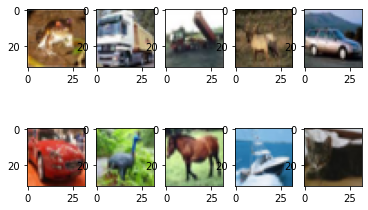

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(training_images[i])
    print(training_labels[i],end=',')
plt.show()

##데이터셋 준비

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(training_images,training_labels,test_size=0.2,random_state=42)

X_test = test_images

In [ ]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test 크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test 크기: (10000, 32, 32, 3)


In [ ]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

##CNN 모델 설계

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='SAME',input_shape=(32,32,3)), #cnn layer
                                    tf.keras.layers.MaxPooling2D(2,2,padding='SAME'), #pooling layer
                                    tf.keras.layers.Dropout(0.23), #무작위로 퍼셉트론 비활성화(23%)
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='SAME'),
                                    tf.keras.layers.MaxPooling2D(2,2,padding='SAME'),
                                    tf.keras.layers.Dropout(0.23),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='SAME'),
                                    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
                                    tf.keras.layers.Dropout(0.23),
                                    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
                                    tf.keras.layers.Dense(1024,activation='relu'), #fully connected layer
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation='softmax') #output layer
    
])

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

##학습



*  batch_size :하드웨어(CPU,GPU)로 로드되는 데이터의 개수이다. 본인의 컴퓨팅 환경에 따라 batch size를 조절하는 것이 좋다.
*  epoch : 전체 트레이닝 셋이 신경망을 통과한 횟수



In [ ]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=10,batch_size=128)

Epoch 1/10
313/313 [==============================] - 50s 155ms/step - loss: 1.8364 - accuracy: 0.3246 - val_loss: 1.5534 - val_accuracy: 0.4459
Epoch 2/10
313/313 [==============================] - 46s 146ms/step - loss: 1.4790 - accuracy: 0.4625 - val_loss: 1.3262 - val_accuracy: 0.5323
Epoch 3/10
313/313 [==============================] - 61s 196ms/step - loss: 1.3592 - accuracy: 0.5082 - val_loss: 1.2320 - val_accuracy: 0.5655
Epoch 4/10
313/313 [==============================] - 45s 145ms/step - loss: 1.2833 - accuracy: 0.5360 - val_loss: 1.1741 - val_accuracy: 0.5853
Epoch 5/10
313/313 [==============================] - 47s 152ms/step - loss: 1.2185 - accuracy: 0.5646 - val_loss: 1.0865 - val_accuracy: 0.6215
Epoch 6/10
313/313 [==============================] - 48s 154ms/step - loss: 1.1647 - accuracy: 0.5822 - val_loss: 1.0510 - val_accuracy: 0.6277
Epoch 7/10
313/313 [==============================] - 48s 153ms/step - loss: 1.1251 - accuracy: 0.5957 - val_loss: 1.0243 - val_ac

In [ ]:
import numpy as np

pred_proba = model.predict(X_test)

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)

pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

#사물이지미 분류 경진대회 베이스라인2

In [ ]:
import random
import numpy as np
from tqdm import tqdm

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision.transforms as transforms

from multiprocessing import cpu_count
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torch.nn import CrossEntropyLoss
from torchvision.models import efficientnet_b3 as efficientnet
from sklearn.model_selection import train_test_split

##데이터 load,전처리

In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(), #이미지 데이터를 tensor 데이터 포맷으로 바꾸어줍니다.
                                transforms.Resize([224,224]),  #이미지의 크기가 다를 수 있으니 크기를 통일해 줍니다.
                                transforms.Normalize(mean=(0.5,0.5,0.5),std=(0.5,0.5,0.5)) #픽셀 단위 데이터를 정규화 시켜줍니다.
])

데이터를 불러와 줍니다.  
PYTORCH 의 ImageFolder 메소르를 사용하면 folder 의 이름을 자동으로 라벨링이 됩니다.  
예를 들어 airplance 이라는 folder 내에 이미지 파일들이 있다면 이미지 파일들의 라벨을 '0'으로 라벨링이 됩니다.

In [ ]:
import tensorflow as tf

(train_data, train_idx), (valid_data,valid_idx) = tf.keras.datasets.cifar10.load_data()



*   batch_size : 하드웨어에 한번에 load 할 데이터의 크기
*   num_workers : 데이터 로드 멀티 프로세싱을 위한 파라미터



In [ ]:
batch_size = 32
num_workers = int(cpu_count()/2)

data loader를 생성해줍니다.  
data loader 란 데이터 셋을 순회하며 모델에 데이터를 넣어주는 객체이다.

In [ ]:
train_loader = DataLoader(train_data,batch_size = batch_size,
                          sampler = SubsetRandomSampler(train_idx),num_workers = num_workers)
valid_loader = DataLoader(train_data,batch_size = batch_size, 
                          sampler = SubsetRandomSampler(valid_idx),num_workers = num_workers)

In [ ]:
train_loader

데이터의 크기를 확인해봅시다.

In [ ]:
train_total = len(train_idx)
valid_total = len(valid_idx)

train_batches = len(train_loader)
valid_batches = len(valid_loader)

In [ ]:
print('total train imgs :',train_total,'/ total train batches :', train_batches)
print('total valid imgs :',valid_total,'/ total balid batches :', valid_batches)

total train imgs : 50000 / total train batches : 1563
total valid imgs : 10000 / total balid batches : 313


##Device 설정

device 를 설정해줍니다.  
이번 베이스라인에서는 gpu 가 있다고 가정하겠다.

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.cuda.is_available()

False

##모델 불러오기 / 파라미터 설정

전이학습을 위한 모델을 load 해줍니다.  
PYTORCH 의 models 메소드를 사용하면 손쉽게 외부의 모델을 불러올 수 있다. 
이번 베이스라인에서는 efficientnet_b3 모델을 사용해 볼 것입니다.  
사전 학습 모델을 사용하는 것은 부정행위에 해당하니, pretrained 파라미터를 False로 설정해야 합니다.  
pretrained 파라미터를 True 로 설정한다면, ImageNet 이라는 데이터셋을 대상으로 학습된 모델이 load 됩니다.   
반면, pretrained 파라미터를 False로 설정한다면, 모델의 구조만 load 되고, 모델의 가중치 들은 load 되지 않습니다.  

In [ ]:
net = models.efficientnet_b3(pretrained=False)
net.classifier

Sequential(
  (0): Dropout(p=0.3, inplace=True)
  (1): Linear(in_features=1536, out_features=1000, bias=True)
)

모델에 데이터를 학습하기 위해서는 모델의 마지막 layer의 output size와 분류할 라벨의 수를 입력해주어야 합니다.

In [ ]:
net.fc = nn.Linear(1000,10)
net = net.to(device)

모델의 파라미터들을 설정해줍니다.

In [ ]:
criterion = CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters(),lr=0.001)
epochs = 10

##학습

반복문을 이용해 학습을 진행시켜줍니다.

In [ ]:
for epoch in range(epochs):
    net.train()

    train_loss = 0
    train_correct = 0
    tqdm_dataset = tqdm(train_loader)
    for x,y in tqdm_dataset:
        x = x.to(device)
        y = y.to(device)
        outputs = net(x)
        loss = criterion(outputs,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _,predicted = outputs.max(1)
        train_correct += predicted.eq(y).sum().item()

        tqdm_dataset.set_postfix({
            'Epoch':epoch +1,
            'Loss':'{:06f}'.format(loss.item()),
        })

        train_loss = train_loss / train_batches
        train_acc - train_correct / train_total

        net.eval()

        valid_loss = 0
        valid_correct = 0
        tqdm_dataset = tqdm(valid_loader)
        with torch.no_grad():
            for x,y in tqdm_dataset:
                x = x.to(device)
                y = y.to(device)
            
                outputs = net(x)
                loss = criterion(outputs, y)
                valid_loss += loss.item()
                _, predicted = outputs.max(1)
                valid_correct += predicted.eq(y).sum().item()
            
                tqdm_dataset.set_postfix({
                    'Epoch': epoch + 1,
                    'Loss': '{:06f}'.format(loss.item()),
                })
            
        valid_loss = valid_loss / valid_batches
        valid_acc = valid_correct / valid_total
        
        print('epochs',epoch+1, 'train loss',train_loss,'train acc', train_acc, 'valid loss',valid_loss, 'valid acc',valid_acc)

  0%|          | 0/1563 [00:00<?, ?it/s]


ValueError: ignored

##모델 저장 / 불러오기

학습된 모델의 가중치를 저장합니다.

In [ ]:
path = '/content/drive/MyDrive/ESAA(22-1)/Week16'
torch.save(path)

저장된 모델을 불러옵니다.

In [ ]:
path = '/content/drive/MyDrive/ESAA(22-1)/Week16'
net.load_state_dict(torch.load(path))

#추론

#[파이썬 딥러닝 텐서플로]

##04 위성 이미지 분류

##04-1 텐서플로 데이터셋 로드

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ESAA(22-1)/Week16')
os.getcwd()

'/content/drive/MyDrive/ESAA(22-1)/Week16'

In [ ]:
import tensorflow as tf
import numpy as np
import json
import matplotlib.pylab as plt

#Tensorflow Datasets 활용
import tensorflow_datasets as tfds

In [ ]:
#EuroSAT 위성 사진 데이터셋 로드
DATA_DIR = 'dataset/'

(train_ds,valid_ds),info = tfds.load('eurosat/rgb',split=['train[:80%]','train[80%:]'],
                                     shuffle_files=True,
                                     as_supervised=True,
                                     with_info=True,
                                     data_dir=DATA_DIR)
print(train_ds)
print(valid_ds)

<_OptionsDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_OptionsDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
#메타 데이터 확인
print(info)

tfds.core.DatasetInfo(
    name='eurosat',
    version=2.0.0,
    description='EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
bands and consisting of 10 classes with 27000 labeled and
geo-referenced samples.

Two datasets are offered:
- rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
- all: Contains all 13 bands in the original value range (float32).

URL: https://github.com/phelber/eurosat',
    homepage='https://github.com/phelber/eurosat',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(64, 64, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=27000,
    splits={
        'train': 27000,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{helber2017eurosat,
        title={EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification},
      

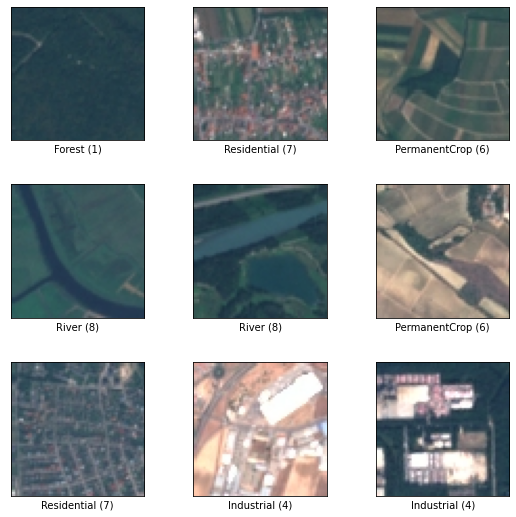

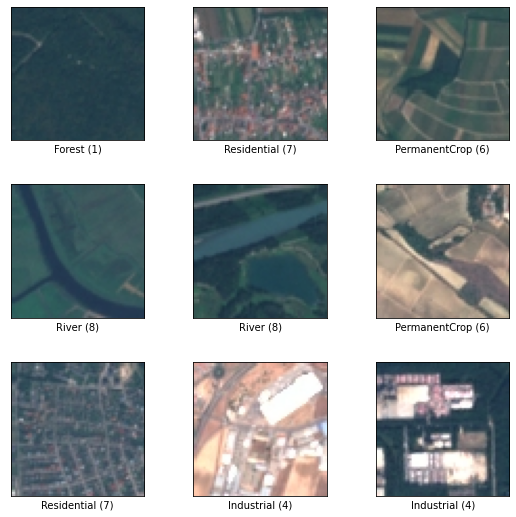

In [ ]:
#데이터 확인
tfds.show_examples(train_ds,info)

,image,label
0,,9 (SeaLake)
1,,8 (River)
2,,9 (SeaLake)
3,,9 (SeaLake)
4,,9 (SeaLake)
5,,0 (AnnualCrop)
6,,2 (HerbaceousVegetation)
7,,0 (AnnualCrop)
8,,0 (AnnualCrop)
9,,2 (HerbaceousVegetation)

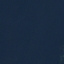
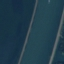
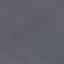
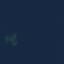
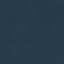
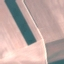
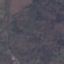
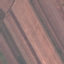
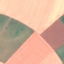
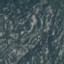

In [ ]:
#as_dataframe 사용하여 샘플 출력
tfds.as_dataframe(valid_ds.take(10),info)

In [ ]:
#목표 클래스의 개수
NUM_CLASSES = info.features['label'].num_classes
print(NUM_CLASSES)

10


In [ ]:
#숫자 레이블을 활용해 문자열 메타 데이터로 변환
print(info.features['label'].int2str(6))

PermanentCrop


##04-2 데이터 전처리

In [ ]:
#데이터 전처리 파이프라인
BATCH_SIZE=64
BUFFER_SIZE=1000

def preprocess_data(image,label):
    image = tf.cast(image,tf.float32)/255.0 #0~1 정규화,float32 변환
    return image,label


train_data = train_ds.map(preprocess_data,num_parallel_calls=tf.data.AUTOTUNE)
valid_data = valid_ds.map(preprocess_data,num_parallel_calls=tf.data.AUTOTUNE)

train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_data = valid_data.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

##04-3 모델 훈련 및 검증

In [ ]:
#Sequential API를 사용하여 샘플 모델 생성

def build_model():

    model = tf.keras.Sequential([
                                 #Convolution 층
                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'),
                                 tf.keras.layers.MaxPooling2D((2,2)),

                                 tf.keras.layers.BatchNormalization(),
                                 tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                                 tf.keras.layers.MaxPooling2D((2,2)),

                                 #Classifier 출력층
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(64,activation='relu'),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')

    ])
    
    return model

model = build_model()

In [ ]:
#모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#모델 훈련
history = model.fit(train_data,validation_data=valid_data,epochs=10)

Epoch 1/10
338/338 [==============================] - 224s 658ms/step - loss: 0.5449 - accuracy: 0.8169 - val_loss: 0.4737 - val_accuracy: 0.8519
Epoch 2/10
338/338 [==============================] - 171s 505ms/step - loss: 0.5035 - accuracy: 0.8289 - val_loss: 0.4565 - val_accuracy: 0.8561
Epoch 3/10
338/338 [==============================] - 164s 485ms/step - loss: 0.4748 - accuracy: 0.8395 - val_loss: 0.4678 - val_accuracy: 0.8494
Epoch 4/10
338/338 [==============================] - 163s 483ms/step - loss: 0.4563 - accuracy: 0.8466 - val_loss: 0.4754 - val_accuracy: 0.8507
Epoch 5/10
338/338 [==============================] - 162s 478ms/step - loss: 0.4226 - accuracy: 0.8570 - val_loss: 0.4843 - val_accuracy: 0.8504
Epoch 6/10
338/338 [==============================] - 163s 483ms/step - loss: 0.4005 - accuracy: 0.8634 - val_loss: 0.4493 - val_accuracy: 0.8646
Epoch 7/10
338/338 [==============================] - 164s 483ms/step - loss: 0.3729 - accuracy: 0.8744 - val_loss: 0.4884 -

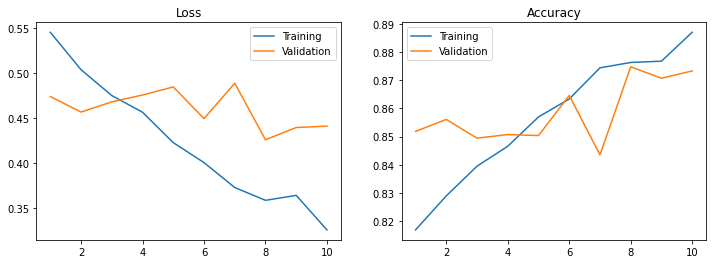

In [ ]:
#손실함수, 정확도 그래프 그리기

def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history,10)

##04-4 데이터 증강(Data Augmentation)

Text(0.5, 1.0, 'Highway')

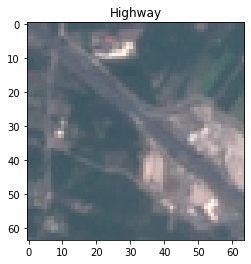

In [ ]:
#샘플 이미지 
image_batch,label_batch = next(iter(train_data.take(1)))

image = image_batch[0]
label = label_batch[0].numpy()

plt.imshow(image)
plt.title(info.features['label'].int2str(label))

In [ ]:
#데이터 증강 전후를 비교하는 시각화 함수를 정의
def plot_augmentation(original,augmented):

    fig,axes = plt.subplots(1,2,figsize=(12,4))

    axes[0].imshow(original)
    axes[0].set_title('Original')

    axes[1].imshow(augmented)
    axes[1].set_title('Augmented')

    plt.show()

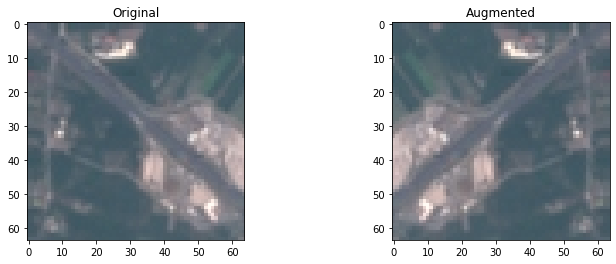

In [ ]:
#좌우 뒤집기
lr_flip = tf.image.flip_left_right(image)
plot_augmentation(image,lr_flip)

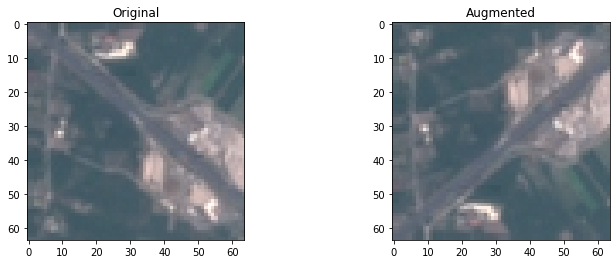

In [ ]:
#상하 뒤집기
ud_flip = tf.image.flip_up_down(image)
plot_augmentation(image,ud_flip)

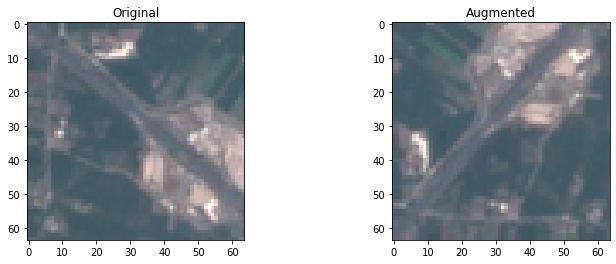

In [ ]:
#회전
rotate90 = tf.image.rot90(image)
plot_augmentation(image,rotate90)

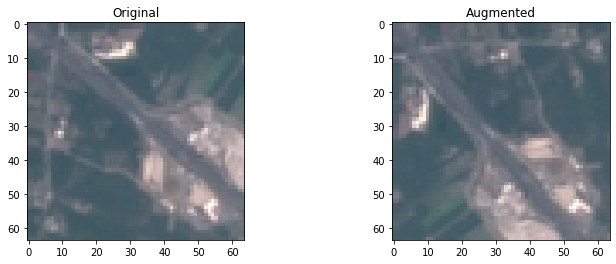

In [ ]:
#transpose
transpose = tf.image.transpose(image)
plot_augmentation(image,transpose)

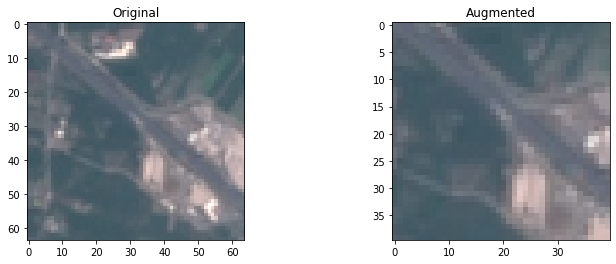

In [ ]:
#이미지 자르기1
crop1 = tf.image.central_crop(image,central_fraction=0.6)
plot_augmentation(image,crop1)

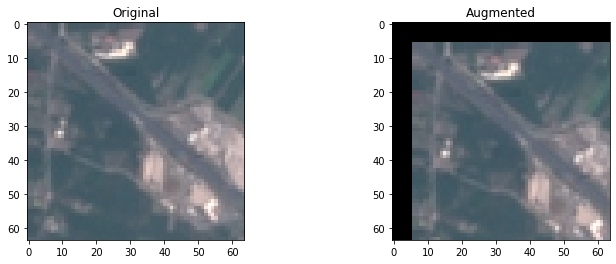

In [ ]:
#이미지 자르기2
img = tf.image.resize_with_crop_or_pad(image,64+20,64+20) #사이즈 키우기
crop2 = tf.image.random_crop(img,size=[64,64,3])
plot_augmentation(image,crop2)

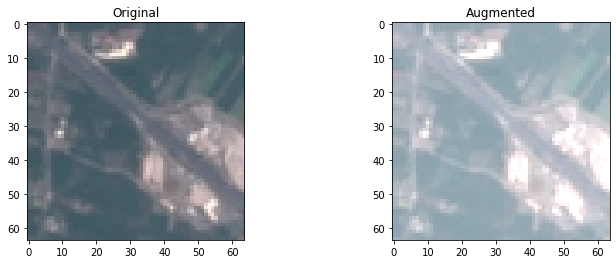

In [ ]:
#이미지 밝기
brightness = tf.image.adjust_brightness(image,delta=0.3)
plot_augmentation(image,brightness)

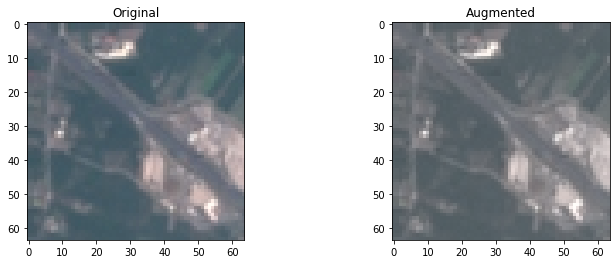

In [ ]:
#이미지 채도
saturation = tf.image.adjust_saturation(image,saturation_factor=0.5)
plot_augmentation(image,saturation)

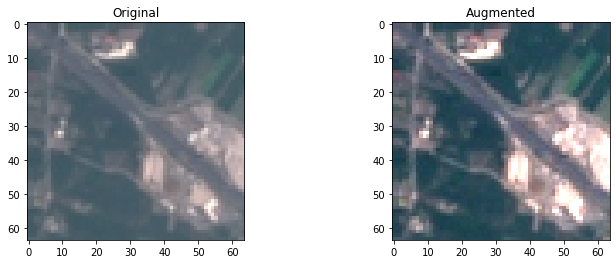

In [ ]:
#이미지 대비
contrast = tf.image.adjust_contrast(image,contrast_factor=2)
plot_augmentation(image,contrast)

In [ ]:
#이미지 증강 전처리
def data_augmentation(image,label):

    image = tf.image.random_flip_left_right(image) #좌우 반전
    image = tf.image.random_flip_up_down(image) #상하 반전
    image = tf.image.random_brightness(image,max_delta=0.3) #밝기 변화
    image = tf.image.random_crop(image,size=[64,64,3])

    image = tf.cast(image,tf.float32)/255.0 #0~1 정규화

    return image,label

train_aug = train_ds.map(data_augmentation,num_parallel_calls=tf.data.AUTOTUNE)
valid_aug = valid_ds.map(data_augmentation,num_parallel_calls=tf.data.AUTOTUNE)

train_aug = train_aug.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_aug = valid_aug.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

print(train_aug)
print(valid_aug)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
#모델 생성
aug_model = build_model()

#모델 컴파일
aug_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#모델 훈련
aug_history = aug_model.fit(train_aug,validation_data = valid_aug,epochs=10)

Epoch 1/10
338/338 [==============================] - 181s 528ms/step - loss: 1.9544 - accuracy: 0.2679 - val_loss: 1.8029 - val_accuracy: 0.3437
Epoch 2/10
338/338 [==============================] - 166s 490ms/step - loss: 1.6471 - accuracy: 0.3475 - val_loss: 1.3763 - val_accuracy: 0.4257
Epoch 3/10
338/338 [==============================] - 164s 485ms/step - loss: 1.5670 - accuracy: 0.3799 - val_loss: 1.3290 - val_accuracy: 0.5039
Epoch 4/10
338/338 [==============================] - 166s 489ms/step - loss: 1.4720 - accuracy: 0.4211 - val_loss: 1.2635 - val_accuracy: 0.5580
Epoch 5/10
338/338 [==============================] - 167s 492ms/step - loss: 1.4115 - accuracy: 0.4508 - val_loss: 1.1657 - val_accuracy: 0.5672
Epoch 6/10
338/338 [==============================] - 165s 487ms/step - loss: 1.3387 - accuracy: 0.4852 - val_loss: 1.0859 - val_accuracy: 0.6319
Epoch 7/10
338/338 [==============================] - 164s 485ms/step - loss: 1.3130 - accuracy: 0.5010 - val_loss: 1.0837 -

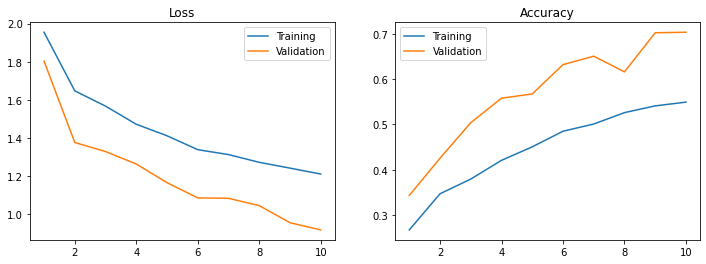

In [58]:
#손실함수, 정확도 그래프 그리기
plot_loss_acc(aug_history,10)

##04-5 ResNet 사전 학습 모델

이미지넷 경진 대회에서 우승한 모델로서 우수한 성능을 가지는 ResNet 모델  
이처럼 사전에 방대한 이미지로 훈련을 받은 딥러닝 모델의 구조와 가중치를 그대로 가져오고, 모델의 끝단에 위치하는 Top층에 위성 이미지를 분류할 수 있는 최종 분류기를 추가하는 방식으로 모델을 구성한다.  이런 것이 **'전이 학습'**  
우리가 사용하는 위성 이미지의 크기가 **(64,64,3)** 이므로 input_sahep 속성에 지정한다. 원래 ResNet 모델의 입력 크기는 (224,224,3)이지만, 케라스에서 이미지 크기를 우리가 지정한 크기로 맞춰서 줄여 준다.  
**가장 중요한 옵션은 include_top = False 로 지정하는 것이다.** 기존 ResNet 모델의 Top층은 이미지넷 경진 대회에 맞는 분류기이므로 False로 지정하여 Top 층을 제거해 주는 것이다. 여기 제거된 부분에 우리가 해결하려는 문제에 맞는 최종 분류기를 대체해서 추가하게 된다.

In [62]:
#Pre-trained 모델을 사전 학습된 가중치와 함께 가져오기
from tensorflow.keras.applications import ResNet50V2

pre_trained_base = ResNet50V2(include_top=False,weights='imagenet',input_shape=[64,64,3])

#사전학습된 가중치를 업데이트 되지 않도록 설정
pre_trained_base.trainable = False

#모델 구조 시각화
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(pre_trained_base,show_shapes=True,show_layer_names=True,to_file='resnet50.png')

ImportError: ignored

In [63]:
#Top 층에 Classifier 추가

def build_trainsfer_classifier():
    model = tf.keras.Sequential([
                                 #Pre-trained Base
                                 pre_trained_base,
                                 #classifier 출력층
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(64,activation='relu'),
                                 tf.keras.layers.Dropout(0.3),
                                 tf.keras.layers.Dense(NUM_CLASSES,activation='softmax'),
    ])
    return model

#모델 구조
tc_model = build_trainsfer_classifier()
tc_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)               